# Final Project

# Intro

In [112]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import geopandas

import sys
import io

In [113]:
df = pd.read_csv('scrubbed.csv', low_memory=False)

#missing locations
df = df.fillna('unknown')

#converting datetime
# df['datetime'] = pd.to_datetime(df['datetime'])

#separating date and time
df['datetime'] = df['datetime'].apply(lambda x: x.split())
df['date'] = df['datetime'].apply(lambda x: x[0])
df['time'] = df['datetime'].apply(lambda x: x[1])
del(df['datetime'])

df['date'] = pd.to_datetime(df['date'])
df['next_day'] = (df['time'] == '24:00') # rows where time = 24:00
df.loc[df['next_day'] == True, 'date'] = df['date'] + pd.Timedelta(days=1) # add a day
df.loc[df['next_day'] == True, 'time'] = '00:00' # set time to 00:00
del(df['next_day'])
df['time'] = pd.to_datetime(df['time']).dt.time

df['date posted'] = pd.to_datetime(df['date posted'])

del(df["duration (hours/min)"]) # duration(seconds) contains the same info in more readable form 



In [114]:
# one of the latitudes had invalid data so finding its index and dropping that row 
df.loc[df['latitude'] == '33q.200088']
df = df.drop(43782)

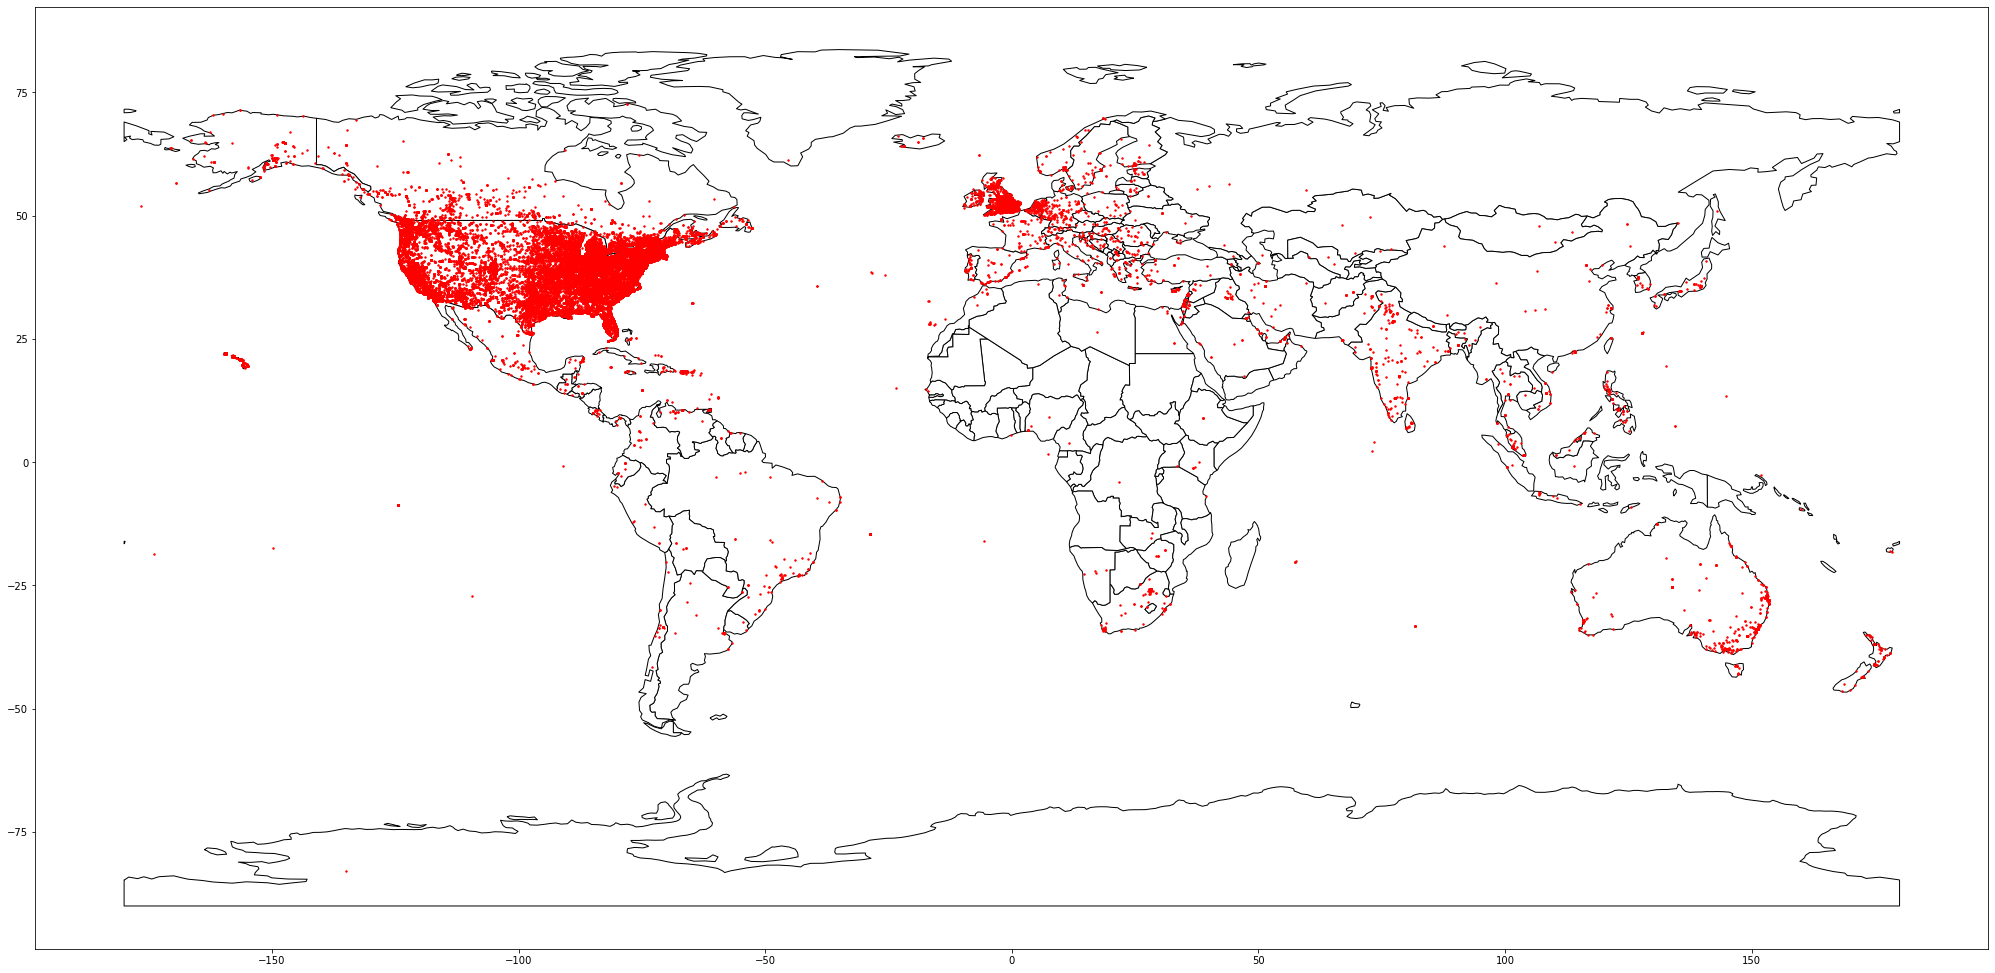

In [118]:
#Distribution of sightings across the world
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['longitude '], df['latitude']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black', figsize=(35, 35))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize=2,legend=True)

plt.show()

In [116]:
df.head(500)

,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude,date,time,geometry
0,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30:00,POINT (-97.94111 29.88306)
1,lackland afb,tx,unknown,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00:00,POINT (-98.58108 29.38421)
2,chester (uk/england),unknown,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00:00,POINT (-2.91667 53.20000)
3,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00:00,POINT (-96.64583 28.97833)
4,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00:00,POINT (-157.80361 21.41806)
5,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889,1961-10-10,19:00:00,POINT (-82.18889 36.59500)
6,penarth (uk/wales),unknown,gb,circle,180,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,1965-10-10,21:00:00,POINT (-3.18000 51.43472)
7,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333,1965-10-10,23:45:00,POINT (-73.40833 41.11750)
8,pell city,al,us,disk,180,Strobe Lighted disk shape object observed clos...,2009-03-19,33.5861111,-86.286111,1966-10-10,20:00:00,POINT (-86.28611 33.58611)
9,live oak,fl,us,disk,120,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.2947222,-82.984167,1966-10-10,21:00:00,POINT (-82.98417 30.29472)
